In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import re

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://ourworldindata.org/explorers/natural-disasters?tab=table&time=2011..latest&facet=none&hideControls=true&Disaster+Type=All+disasters+%28by+type%29&Impact=Deaths&Timespan=Annual&Per+capita=false&country=~OWID_WRL"
#url = "https://ourworldindata.org/explorers/natural-disasters?tab=table&time=2011..latest&facet=none&country=~OWID_WRL&hideControls=true&Disaster+Type=Floods&Impact=Deaths&Timespan=Annual&Per+capita=false"
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
There is no [win32] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\wooi_ling_chin\.wdm\drivers\chromedriver\win32\99.0.4844.51]
C:\Users\WOOI_L~1\AppData\Local\Temp/ipykernel_19104/2302255397.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [2]:
soup = bs(driver.page_source,"html.parser")

In [3]:
masterlist= []
header = []
for colname in soup.find('tr').find_all('th'):
    header.append(colname.text)
for tr in soup.find('table').find_all('tr'):
    row=[]
    for item in tr.find_all('td'):
        row.append(item.text)
    if len(row) != 0:
        masterlist.append(row)
print(masterlist)

[['Afghanistan', '4.50', '0.00', '15.10', '84.80', '0.00', '0.00', '21.70', '137.00', '0.00'], ['Africa', '14.50', '7.10', '291.60', '242.50', '0.00', '0.00', '3.10', '724.50', '2,000.00'], ['Albania', '1.10', '0.00', '0.00', '0.00', '0.00', '0.00', '5.10', '0.40', '0.00'], ['Algeria', '0.80', '0.00', '0.00', '0.00', '0.00', '0.00', '0.60', '9.70', '0.00'], ['American Samoa', '', '', '', '', '', '', '', '', ''], ['Angola', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '44.20', '0.00'], ['Anguilla', '0.00', '0.00', '0.40', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['Antigua and Barbuda', '0.00', '0.00', '0.10', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['Argentina', '4.20', '0.00', '3.30', '2.40', '0.00', '0.00', '0.00', '7.90', '0.80'], ['Armenia', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['Asia', '753.30', '15.10', '1,968.60', '601.60', '9.20', '88.10', '4,225.10', '3,723.10', '8.80'], ['Australia', '13.90', '4.10', '3.30', '0.00

In [4]:
# CSV file
df = pd.DataFrame(masterlist,columns=header)
df.to_csv('naturalDisaster.csv',index=False)

In [5]:
from matplotlib import pyplot as plt
data = pd.read_csv("naturalDisaster.csv")

In [16]:
data.head()

,Country,Extreme temperature,Wildfire,Storms,Landslides,Mass movement (dry),Volcanic activity,Earthquakes,Flood,Drought
0,Afghanistan,4.50,0.0,15.10,84.80,0.0,0.0,21.70,137.00,0.00
1,Africa,14.50,7.1,291.60,242.50,0.0,0.0,3.10,724.50,"2,000.00"
2,Albania,1.10,0.0,0.00,0.00,0.0,0.0,5.10,0.40,0.00
3,Algeria,0.80,0.0,0.00,0.00,0.0,0.0,0.60,9.70,0.00
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = pd.DataFrame(data, columns= ['Country','Flood'])

In [22]:
df.dropna()

,Country,Flood
0,Afghanistan,137.00
1,Africa,724.50
2,Albania,0.40
3,Algeria,9.70
5,Angola,44.20
...,...,...
220,Wallis and Futuna,0.00
221,World,"5,067.30"
222,Yemen,15.80
224,Zambia,0.40


TypeError: 'value' must be an instance of str or bytes, not a float

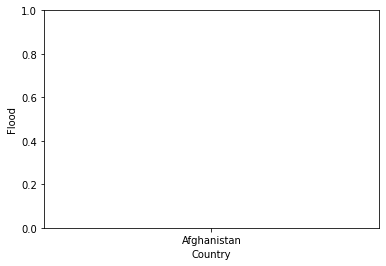

In [23]:
x = df['Country']
y = df['Flood']

plt.xlabel('Country')
plt.ylabel('Flood')
plt.bar(x,y)
plt.show()